In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#save file or restart from here:

# read pickle file as dataframe
fdfe = pd.read_pickle('SQOOP_fdfe.pkl')
# display the dataframe
fdfe

,Windspeed(m_s),Humidity(%),FMF,AOD(869),chla(mg_m3),plastic_threshold,solz,relaz,senz,plastic_unc_median,SIC_median,plastic_avgK_median,DFS_median
0,0.5,30.0,0.01,0.04,0.05,0.061213,15.0,40.0,15.0,0.034150,18.323713,0.995334,3.806892
1,0.5,30.0,0.01,0.04,0.05,0.046424,15.0,40.0,30.0,0.026122,15.604201,0.997270,3.221448
2,0.5,30.0,0.01,0.04,0.05,0.036759,15.0,40.0,60.0,0.017642,15.001254,0.998750,3.893049
3,0.5,30.0,0.01,0.04,0.05,0.021841,15.0,110.0,15.0,0.011863,16.696411,0.999435,3.950530
4,0.5,30.0,0.01,0.04,0.05,0.031967,15.0,110.0,30.0,0.016817,15.966736,0.998866,3.714407
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15303,15.0,95.0,0.95,0.40,2.00,0.020029,60.0,110.0,15.0,0.011475,10.200517,0.999473,3.007352
15304,15.0,95.0,0.95,0.40,2.00,0.018606,60.0,110.0,30.0,0.010998,10.012692,0.999516,2.973358
15305,15.0,95.0,0.95,0.40,2.00,0.047686,60.0,110.0,60.0,0.028003,9.181176,0.996863,3.017742
15306,15.0,95.0,0.95,0.40,2.00,0.022100,60.0,170.0,15.0,0.013489,10.542571,0.999272,3.220736


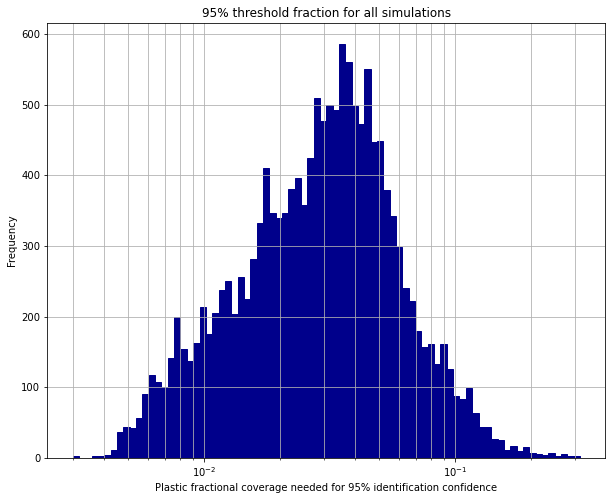

In [3]:
bn=80

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
plt.title('95% threshold fraction for all simulations')

this=fdfe['plastic_threshold']
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,label='FMF=0.01',color='darkblue',edgecolor='darkblue')

plt.xlabel('Plastic fractional coverage needed for 95% identification confidence')
plt.ylabel('Frequency')

plt.xscale('log')
plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_all.pdf')
plt.show()

[0.5, 5.0, 15.0]


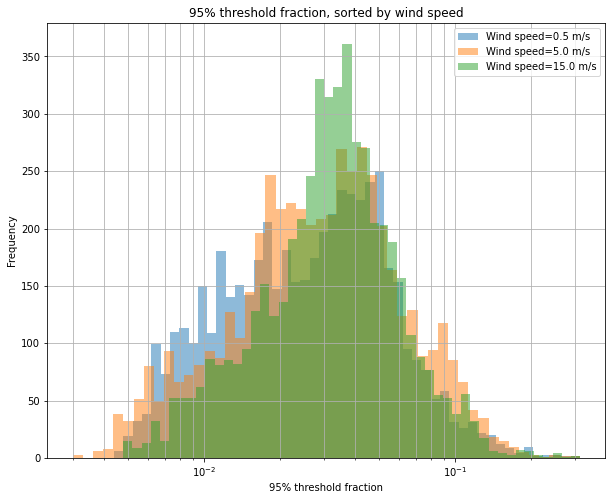

In [4]:
bn=50

a = fdfe['Windspeed(m_s)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
plt.title('95% threshold fraction, sorted by wind speed')

this=fdfe['plastic_threshold'][fdfe['Windspeed(m_s)']==0.5]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Wind speed=0.5 m/s')

this=fdfe['plastic_threshold'][fdfe['Windspeed(m_s)']==5.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Wind speed=5.0 m/s')

this=fdfe['plastic_threshold'][fdfe['Windspeed(m_s)']==15.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Wind speed=15.0 m/s')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_windspeed.pdf')
plt.show()


[30.0, 70.0, 95.0]


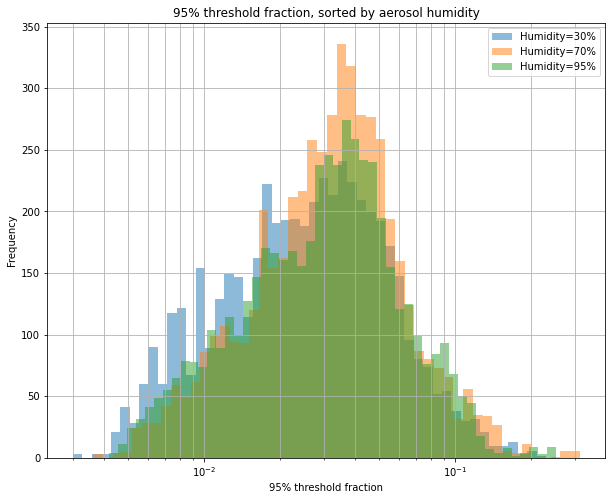

In [5]:
bn=50

a = fdfe['Humidity(%)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
plt.title('95% threshold fraction, sorted by aerosol humidity')

this=fdfe['plastic_threshold'][fdfe['Humidity(%)']==30.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Humidity=30%')

this=fdfe['plastic_threshold'][fdfe['Humidity(%)']==70.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Humidity=70%')

this=fdfe['plastic_threshold'][fdfe['Humidity(%)']==95.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Humidity=95%')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_humidity.pdf')
plt.show()

[0.01, 0.5, 0.95]


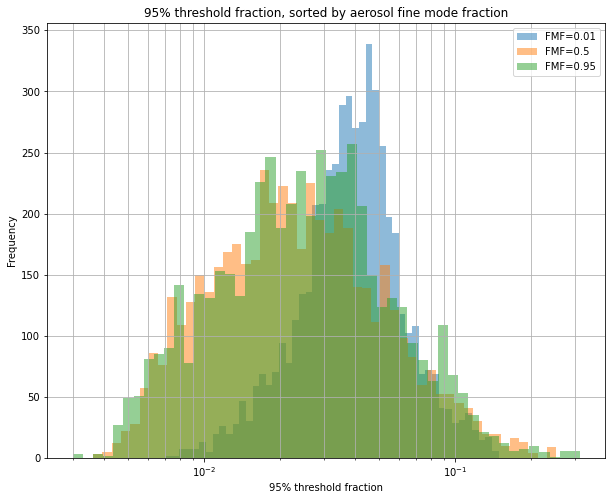

In [6]:
bn=50

a = fdfe['FMF'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
plt.title('95% threshold fraction, sorted by aerosol fine mode fraction')

this=fdfe['plastic_threshold'][fdfe['FMF']==0.01]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='FMF=0.01')

this=fdfe['plastic_threshold'][fdfe['FMF']==0.5]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='FMF=0.5')

this=fdfe['plastic_threshold'][fdfe['FMF']==0.95]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='FMF=0.95')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_FMF.pdf')
plt.show()

[0.04, 0.07, 0.1, 0.15, 0.2, 0.3, 0.4]


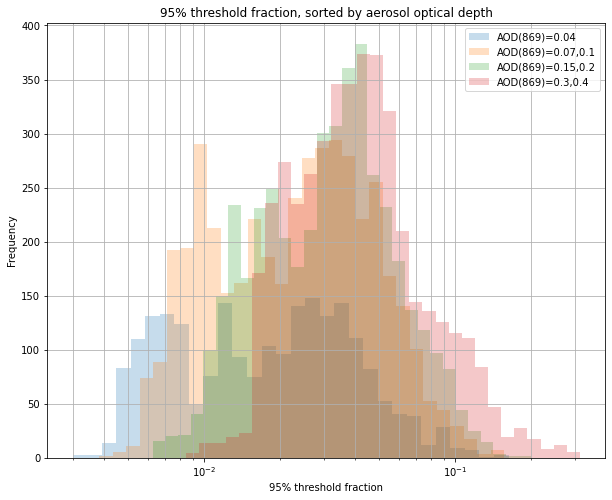

In [7]:
bn=30

a = fdfe['AOD(869)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
plt.title('95% threshold fraction, sorted by aerosol optical depth')

this=fdfe['plastic_threshold'][fdfe['AOD(869)']==0.04]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.04')

this=fdfe['plastic_threshold'][(fdfe['AOD(869)']==0.07) | (fdfe['AOD(869)']==0.1)]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.07,0.1')

this=fdfe['plastic_threshold'][(fdfe['AOD(869)']==0.15) | (fdfe['AOD(869)']==0.2)]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.15,0.2')

this=fdfe['plastic_threshold'][(fdfe['AOD(869)']==0.3) | (fdfe['AOD(869)']==0.4)]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.25,label='AOD(869)=0.3,0.4')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_AOD.pdf')
plt.show()


[0.05, 0.5, 2.0]


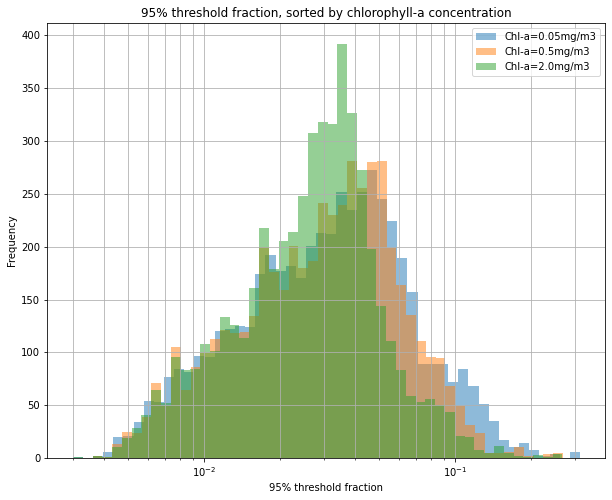

In [8]:
bn=50

a = fdfe['chla(mg_m3)'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
plt.title('95% threshold fraction, sorted by chlorophyll-a concentration')

this=fdfe['plastic_threshold'][fdfe['chla(mg_m3)']==0.05]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Chl-a=0.05mg/m3')

this=fdfe['plastic_threshold'][fdfe['chla(mg_m3)']==0.5]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Chl-a=0.5mg/m3')

this=fdfe['plastic_threshold'][fdfe['chla(mg_m3)']==2.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='Chl-a=2.0mg/m3')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_Chla.pdf')
plt.show()


[15.0, 30.0, 60.0]


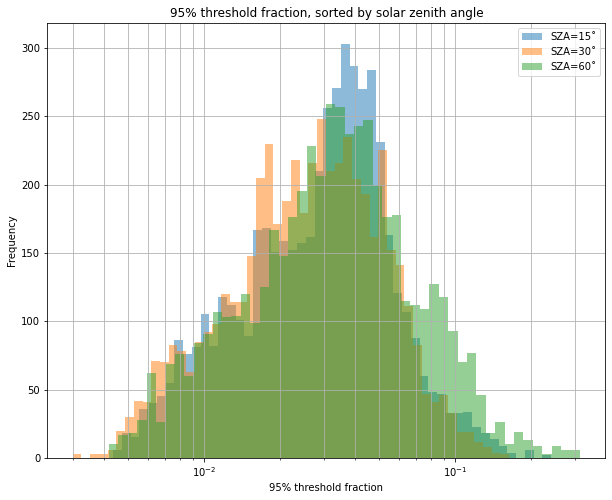

In [9]:
bn=50

a = fdfe['solz'].unique()
print(sorted(a))

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
plt.title('95% threshold fraction, sorted by solar zenith angle')

this=fdfe['plastic_threshold'][fdfe['solz']==15.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='SZA=15˚')

this=fdfe['plastic_threshold'][fdfe['solz']==30.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='SZA=30˚')

this=fdfe['plastic_threshold'][fdfe['solz']==60.0]
hist, bins = np.histogram(this, bins=bn)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(this, bins=logbins,alpha=0.5,label='SZA=60˚')

plt.legend(loc='upper right') 
plt.xlabel('95% threshold fraction')
plt.ylabel('Frequency')

plt.xscale('log')

plt.savefig('figures/SQOOP_Rodgers_ICA_threshold_solz.pdf')
plt.show()
